# Loan Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from lazypredict.Supervised import LazyClassifier

In [10]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
pd.set_option('Display.max_columns', None)

In [14]:
train=pd.read_csv('./train_ctrUa4K.csv')
test=pd.read_csv('./test_lAUu6dG.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [18]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [22]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.00,95.00,360.00,1.00,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.00,158.00,360.00,0.00,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.00,168.00,360.00,1.00,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.00,349.00,360.00,1.00,Semiurban,N


In [24]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [30]:
numeric_columns = train.select_dtypes(include=['number'])
categorical_columns = train.select_dtypes(include=['object', 'category'])

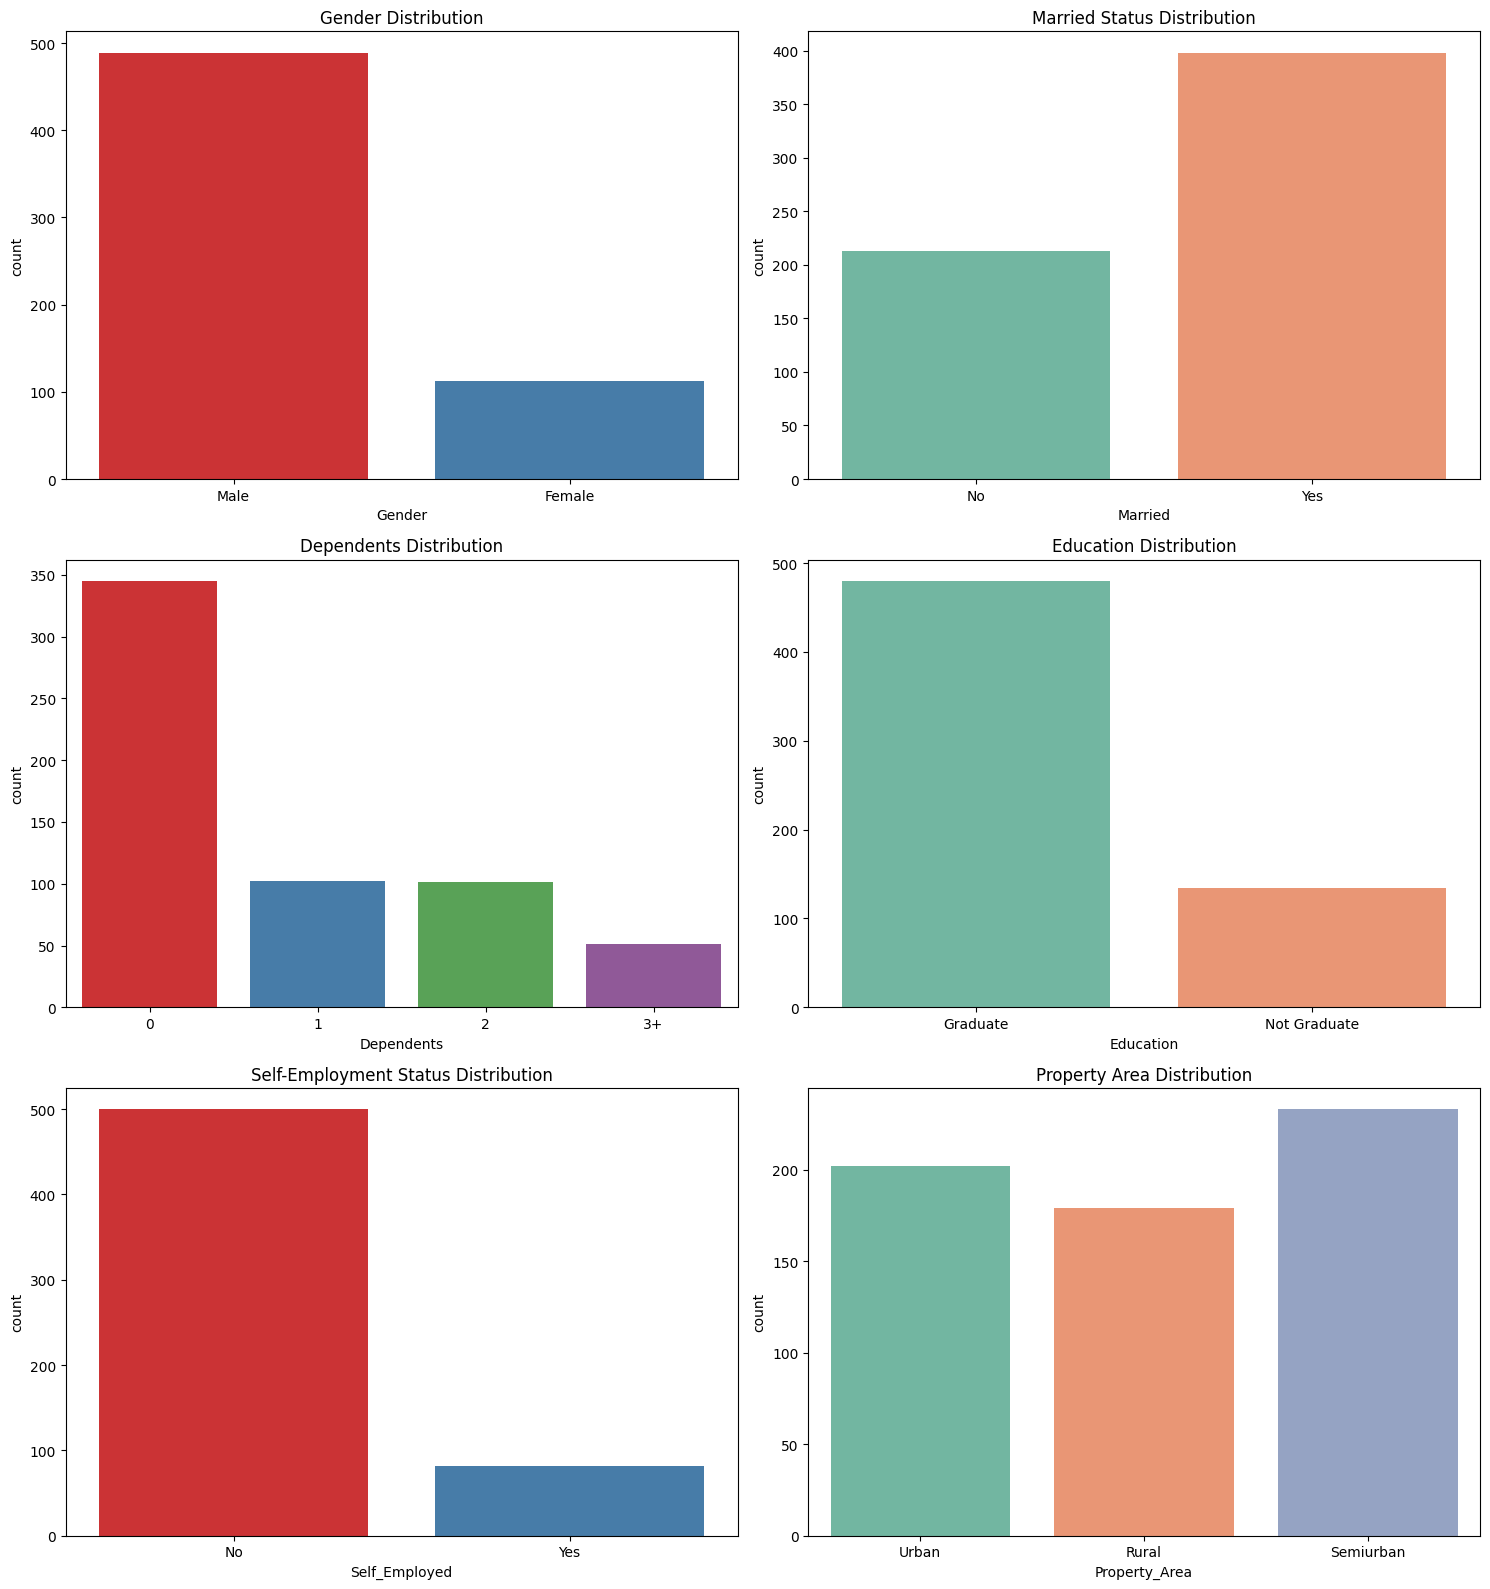

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(15, 16))  # Create a grid of subplots

# Plot countplots for each categorical column
sns.countplot(data=train, x='Gender', ax=ax[0, 0], palette='Set1')
sns.countplot(data=train, x='Married', ax=ax[0, 1], palette='Set2')
sns.countplot(data=train, x='Dependents', ax=ax[1, 0], palette='Set1')
sns.countplot(data=train, x='Education', ax=ax[1, 1], palette='Set2')
sns.countplot(data=train, x='Self_Employed', ax=ax[2, 0], palette='Set1')
sns.countplot(data=train, x='Property_Area', ax=ax[2, 1], palette='Set2')

# Set titles for each subplot for better readability
ax[0, 0].set_title('Gender Distribution')
ax[0, 1].set_title('Married Status Distribution')
ax[1, 0].set_title('Dependents Distribution')
ax[1, 1].set_title('Education Distribution')
ax[2, 0].set_title('Self-Employment Status Distribution')
ax[2, 1].set_title('Property Area Distribution')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

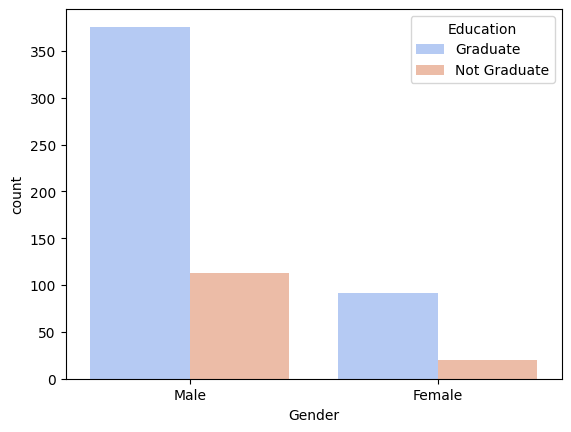

In [144]:
sns.countplot(x='Gender', hue = 'Education', data=train, palette = 'coolwarm')

In [34]:
print(train.duplicated().sum())

0


In [36]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### now we will replace the null values with mean mode and median. 
- Gender : 
- Married : It has 2 categories. we can replace this with whichever has higher proportion, in this case its 'Yes'
- Dependents : the values can be replaced with Mode since its a categorical variable and for simplicity. 
- Self-Employed : its a Yes/No category, so we will use mode. 
- LoanAmount : using mean in this case as the distruibuton is even and data is not skwed. (if skewd, use median but ssensitive to outliers.)
- Loan_Amount_Term : use mode, because values are in intervals categories. 
- Credit_History :  2 categories so it will be replcaed with mode.

- Use the median of the non-null values, which is less sensitive to outliers. Recommended only if data is Skewed. 

In [39]:
train['Loan_ID'] = train['Loan_ID'].str.replace('LP00', '') #removing the extra character in the ID as it will be used for smple submissn. 
test['Loan_ID'] = test['Loan_ID'].str.replace('LP00', '')

In [41]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [43]:
train['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [45]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [47]:
train['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [49]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.00    512
180.00     44
480.00     15
300.00     13
84.00       4
240.00      4
120.00      3
60.00       2
36.00       2
12.00       1
Name: count, dtype: int64

In [51]:
train['Credit_History'].value_counts()

Credit_History
1.00    475
0.00     89
Name: count, dtype: int64

In [55]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('Yes')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean()) 
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0]) 

In [57]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
test['Gender'] = test['Gender'].fillna('Male')
test['Married'] = test['Married'].fillna('Yes')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean()) 
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0]) 

In [65]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [67]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [71]:
train['Loan_ID'] = train['Loan_ID'].astype('int64')
test['Loan_ID'] = test['Loan_ID'].astype('int64')

In [73]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [75]:
# property_area is a categorical var, 

In [77]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    print(f"Value counts for {col}:\n{train[col].value_counts()}\n")

Value counts for Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64

Value counts for Married:
Married
Yes    401
No     213
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for Self_Employed:
Self_Employed
No     500
Yes    114
Name: count, dtype: int64

Value counts for Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64



In [79]:
label_encoder = LabelEncoder()
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status']) 

In [81]:
binary_columns = ['Gender', 'Married', 'Education', 'Self_Employed']
# Apply label encoding
for col in binary_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])
# Check the transformed data
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,0,0,5849,0.00,146.41,360,1.00,Urban,1
1,1003,1,1,1,0,0,4583,1508.00,128.00,360,1.00,Rural,0
2,1005,1,1,0,0,1,3000,0.00,66.00,360,1.00,Urban,1
3,1006,1,1,0,1,0,2583,2358.00,120.00,360,1.00,Urban,1
4,1008,1,0,0,0,0,6000,0.00,141.00,360,1.00,Urban,1
5,1011,1,1,2,0,1,5417,4196.00,267.00,360,1.00,Urban,1
6,1013,1,1,0,1,0,2333,1516.00,95.00,360,1.00,Urban,1
7,1014,1,1,3+,0,0,3036,2504.00,158.00,360,0.00,Semiurban,0
8,1018,1,1,2,0,0,4006,1526.00,168.00,360,1.00,Urban,1
9,1020,1,1,1,0,0,12841,10968.00,349.00,360,1.00,Semiurban,0


In [83]:
train = pd.get_dummies(train, columns=['Property_Area'], drop_first=True)


In [85]:
test = pd.get_dummies(test, columns=['Property_Area'], drop_first=True)


In [87]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1002,1,0,0,0,0,5849,0.00,146.41,360,1.00,1,False,True
1,1003,1,1,1,0,0,4583,1508.00,128.00,360,1.00,0,False,False
2,1005,1,1,0,0,1,3000,0.00,66.00,360,1.00,1,False,True
3,1006,1,1,0,1,0,2583,2358.00,120.00,360,1.00,1,False,True
4,1008,1,0,0,0,0,6000,0.00,141.00,360,1.00,1,False,True
5,1011,1,1,2,0,1,5417,4196.00,267.00,360,1.00,1,False,True
6,1013,1,1,0,1,0,2333,1516.00,95.00,360,1.00,1,False,True
7,1014,1,1,3+,0,0,3036,2504.00,158.00,360,0.00,0,True,False
8,1018,1,1,2,0,0,4006,1526.00,168.00,360,1.00,1,False,True
9,1020,1,1,1,0,0,12841,10968.00,349.00,360,1.00,0,True,False


In [89]:
scaler = StandardScaler()

train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [91]:
scaler = StandardScaler()
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [119]:
train['Dependents'] = train['Dependents'].replace('3+', 3)
train['Dependents'] = pd.to_numeric(train['Dependents'], errors='coerce')

test['Dependents'] = test['Dependents'].replace('3+', 3)
test['Dependents'] = pd.to_numeric(test['Dependents'], errors='coerce')

In [121]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    float64
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    float64
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
dtypes: bool(2), float64(6), in

In [123]:
train1=train.copy()
test1=test.copy()

In [125]:
train2=train.copy()
test2=test.copy()

### Modeling

In [127]:
X = train1.drop('Loan_Status', axis = 1)
y = train1['Loan_Status']
X_test = test1

In [129]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7886
Confusion Matrix:
[[18 25]
 [ 1 79]]


In [135]:
from imblearn.over_sampling import SMOTE


X = train2.drop('Loan_Status', axis = 1)
y = train2['Loan_Status']
X_test = test2
# Assuming X and y are your features and target variable respectively
# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [139]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)

100%|██████████| 32/32 [00:02<00:00, 14.09it/s]

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [137]:
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],
        ['AdaBoostClassifier ', AdaBoostClassifier()],
        ['ExtraTreesClassifier ', ExtraTreesClassifier()],
        ['XGBClassifier ', XGBClassifier()],
        ['GradientBoostingClassifier ', GradientBoostingClassifier()],
        ['KNeighborsClassifier ', KNeighborsClassifier()],
         ['SVC ', SVC()]]